In [41]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

#### Queremos agora prever quais usuários têm maior probabilidade de fazer uma segunda compra em até 30 dias após a realização da primeira. Suponhamos que segundo um estudo feito no passado, estes usuários possuem maior probabilidade de fidelizar na empresa e passar a realizar aquisições mensalmente.

In [42]:
df = pd.read_csv('olist_segunda_compra.csv')
df.shape

(99441, 14)

In [43]:
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')


In [44]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [46]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [47]:
products = products.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'],axis = 1)
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [48]:
df_total = df.merge((items.merge(products, how='left', on='product_id')).merge(payments, how='inner', on='order_id'),how='left', on='order_id')

In [49]:
df_total.shape

(118377, 29)

In [50]:
df_total.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,data_compra+30,segunda_compra,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2016-10-04 21:15:19,0,1.0,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao,1400.0,32.0,6.0,28.0,1.0,credit_card,1.0,136.23
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2016-10-04 21:15:19,0,2.0,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,1800.0,32.0,6.0,28.0,1.0,credit_card,1.0,136.23
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,2016-10-05 00:15:34,0,1.0,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,telefonia,700.0,25.0,2.0,25.0,1.0,credit_card,3.0,75.06
3,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,2016-10-13 15:24:19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-10-15 12:16:38,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_sem_id = df_total.drop(columns=['order_id','customer_id','order_item_id','product_id','seller_id'])

In [52]:
df_sem_id.sort_values(['customer_unique_id','order_purchase_timestamp'], inplace=True)

In [53]:
df_sem_id['frete/total'] = df_sem_id['freight_value']/(df_sem_id['freight_value']+df_sem_id['price'])

In [54]:
#lista de clientes que compraram uma segunda vez em menos de 30 diass

clientes_segunda_compra = df_sem_id.loc[df_sem_id.segunda_compra == 1].customer_unique_id.unique()

df_segunda_compra = df_sem_id[df_sem_id['customer_unique_id'].isin(clientes_segunda_compra)]

In [55]:
# Dataframe dos clientes que realizaram uma segunda compra em menos de 30 dias. Na coluna segunda compra, 1 significa que foi realizada uma segunda compra e 0 o que foi comprado.
df_segunda_compra.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,data_compra+30,segunda_compra,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,frete/total
109681,delivered,2018-07-28 00:23:49,2018-07-28 00:35:19,2018-07-31 15:57:00,2018-08-07 19:28:41,2018-08-22 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,2018-08-27 00:23:49,1,2018-08-02 00:35:19,74.50,47.57,papelaria,6250.0,25.0,50.0,25.0,1.0,credit_card,2.0,122.07,0.389694
114877,canceled,2018-08-13 09:14:07,NaN,NaN,NaN,2018-09-05 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,2018-09-12 09:14:07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94885,delivered,2018-05-23 20:14:21,2018-05-23 20:35:15,2018-05-29 14:09:00,2018-06-11 20:41:33,2018-06-27 00:00:00,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2018-06-22 20:14:21,1,2018-06-04 20:30:43,69.90,26.57,esporte_lazer,2200.0,16.0,11.0,11.0,1.0,credit_card,1.0,96.47,0.275422
96498,delivered,2018-06-03 10:12:57,2018-06-03 10:50:00,2018-06-04 14:18:00,2018-06-19 16:04:46,2018-07-11 00:00:00,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2018-07-03 10:12:57,0,2018-06-11 10:50:00,11.55,15.23,eletronicos,175.0,22.0,12.0,15.0,1.0,credit_card,1.0,26.78,0.568708
5697,delivered,2017-03-21 19:25:22,2017-03-21 19:25:22,2017-03-22 11:23:35,2017-03-27 11:30:19,2017-04-11 00:00:00,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,sao paulo,SP,2017-04-20 19:25:22,1,2017-03-27 19:25:22,29.90,14.52,eletrodomesticos,100.0,19.0,8.0,13.0,1.0,boleto,1.0,44.42,0.326880


In [56]:
#o que foi comprado na segunda compra
df_produto_comprado = df_segunda_compra[df_segunda_compra.segunda_compra == 0]

Text(0.5, 1.0, 'Produtos comprados na segunda compra')

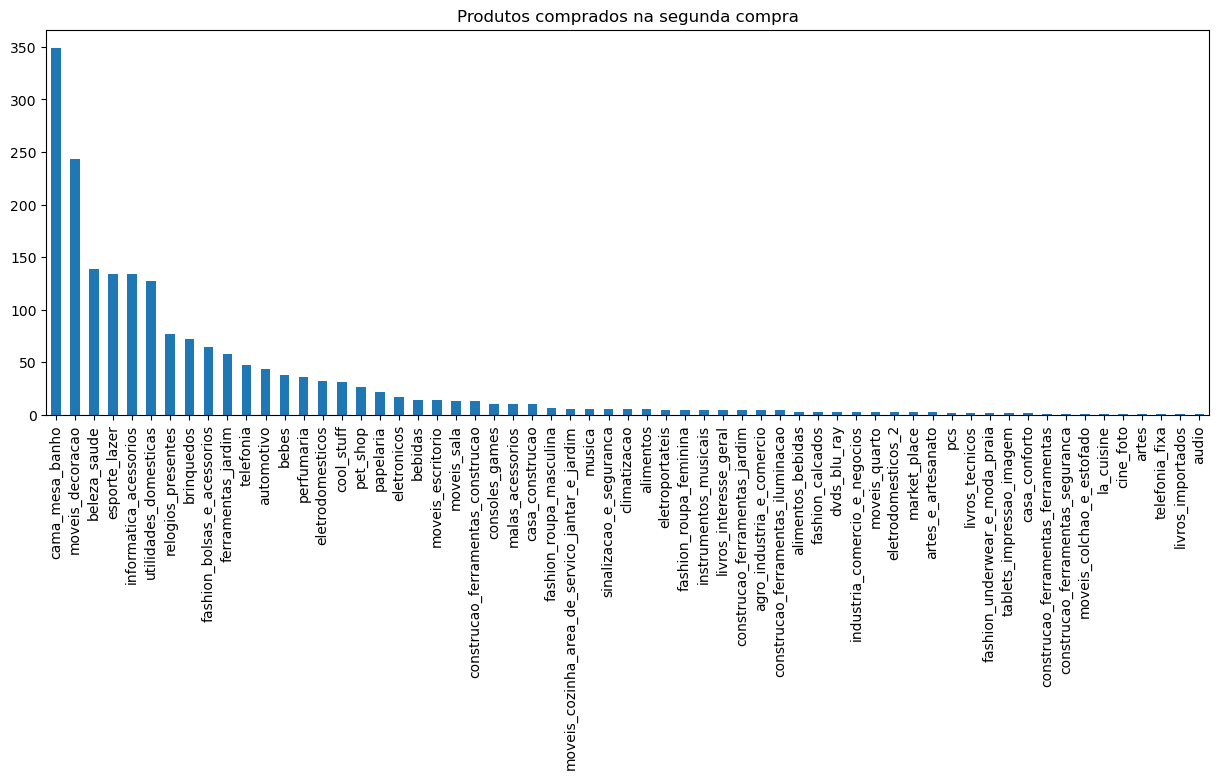

In [57]:
fig = plt.figure(figsize=(15,5))
df_produto_comprado.product_category_name.value_counts().plot(kind='bar')
plt.title('Produtos comprados na segunda compra')

In [58]:
df_segunda_compra['tempo_espera'] = (pd.to_datetime(df_segunda_compra['order_delivered_customer_date']) - pd.to_datetime(df_segunda_compra['order_purchase_timestamp'])).dt.days
df_segunda_compra

C:\Users\danil\AppData\Local\Temp\ipykernel_10056\3123367929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segunda_compra['tempo_espera'] = (pd.to_datetime(df_segunda_compra['order_delivered_customer_date']) - pd.to_datetime(df_segunda_compra['order_purchase_timestamp'])).dt.days


,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,data_compra+30,segunda_compra,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,frete/total,tempo_espera
109681,delivered,2018-07-28 00:23:49,2018-07-28 00:35:19,2018-07-31 15:57:00,2018-08-07 19:28:41,2018-08-22 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,2018-08-27 00:23:49,1,2018-08-02 00:35:19,74.50,47.57,papelaria,6250.0,25.0,50.0,25.0,1.0,credit_card,2.0,122.07,0.389694,10.0
114877,canceled,2018-08-13 09:14:07,NaN,NaN,NaN,2018-09-05 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,2018-09-12 09:14:07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94885,delivered,2018-05-23 20:14:21,2018-05-23 20:35:15,2018-05-29 14:09:00,2018-06-11 20:41:33,2018-06-27 00:00:00,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2018-06-22 20:14:21,1,2018-06-04 20:30:43,69.90,26.57,esporte_lazer,2200.0,16.0,11.0,11.0,1.0,credit_card,1.0,96.47,0.275422,19.0
96498,delivered,2018-06-03 10:12:57,2018-06-03 10:50:00,2018-06-04 14:18:00,2018-06-19 16:04:46,2018-07-11 00:00:00,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2018-07-03 10:12:57,0,2018-06-11 10:50:00,11.55,15.23,eletronicos,175.0,22.0,12.0,15.0,1.0,credit_card,1.0,26.78,0.568708,16.0
5697,delivered,2017-03-21 19:25:22,2017-03-21 19:25:22,2017-03-22 11:23:35,2017-03-27 11:30:19,2017-04-11 00:00:00,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,sao paulo,SP,2017-04-20 19:25:22,1,2017-03-27 19:25:22,29.90,14.52,eletrodomesticos,100.0,19.0,8.0,13.0,1.0,boleto,1.0,44.42,0.326880,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117004,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,2018-09-19 09:03:23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117828,canceled,2018-08-23 12:38:08,NaN,NaN,NaN,2018-09-06 00:00:00,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,2018-09-22 12:38:08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3081,delivered,2017-02-22 12:26:42,2017-02-22 13:05:25,2017-02-23 13:26:17,2017-03-08 02:02:59,2017-03-23 00:00:00,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,2017-03-24 12:26:42,0,2017-02-26 12:26:42,24.90,14.52,fashion_bolsas_e_acessorios,150.0,16.0,5.0,11.0,1.0,credit_card,2.0,39.42,0.368341,13.0
26604,delivered,2017-08-23 13:15:29,2017-08-23 13:30:19,2017-09-22 13:45:55,2017-09-25 21:34:47,2017-09-21 00:00:00,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,2017-09-22 13:15:29,1,2017-09-04 13:30:19,40.00,17.60,cama_mesa_banho,1000.0,50.0,12.0,12.0,1.0,credit_card,2.0,57.60,0.305556,33.0


In [59]:
#dataframe das primeiras compras das pessoas que realizaram uma segunda compra
df_primeira_compra = df_segunda_compra[df_segunda_compra.segunda_compra == 1]
df_primeira_compra

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,data_compra+30,segunda_compra,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,frete/total,tempo_espera
109681,delivered,2018-07-28 00:23:49,2018-07-28 00:35:19,2018-07-31 15:57:00,2018-08-07 19:28:41,2018-08-22 00:00:00,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,2018-08-27 00:23:49,1,2018-08-02 00:35:19,74.50,47.57,papelaria,6250.0,25.0,50.0,25.0,1.0,credit_card,2.0,122.07,0.389694,10.0
94885,delivered,2018-05-23 20:14:21,2018-05-23 20:35:15,2018-05-29 14:09:00,2018-06-11 20:41:33,2018-06-27 00:00:00,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,2018-06-22 20:14:21,1,2018-06-04 20:30:43,69.90,26.57,esporte_lazer,2200.0,16.0,11.0,11.0,1.0,credit_card,1.0,96.47,0.275422,19.0
5697,delivered,2017-03-21 19:25:22,2017-03-21 19:25:22,2017-03-22 11:23:35,2017-03-27 11:30:19,2017-04-11 00:00:00,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,sao paulo,SP,2017-04-20 19:25:22,1,2017-03-27 19:25:22,29.90,14.52,eletrodomesticos,100.0,19.0,8.0,13.0,1.0,boleto,1.0,44.42,0.326880,5.0
101095,delivered,2018-06-21 04:46:11,2018-06-21 05:16:24,2018-06-21 12:59:00,2018-06-22 19:53:49,2018-07-13 00:00:00,013ef03e0f3f408dd9bf555e4edcdc0a,13092,campinas,SP,2018-07-21 04:46:11,1,2018-06-29 05:16:24,166.44,9.86,brinquedos,550.0,26.0,12.0,17.0,1.0,credit_card,3.0,176.30,0.055927,1.0
44252,delivered,2017-11-24 13:33:20,2017-11-24 15:53:40,2017-11-27 14:34:13,2017-12-06 13:12:48,2017-12-26 00:00:00,013f4353d26bb05dc6652f1269458d8d,44065,feira de santana,BA,2017-12-24 13:33:20,1,2017-12-05 15:53:40,148.90,43.45,esporte_lazer,2386.0,29.0,30.0,26.0,1.0,credit_card,3.0,192.35,0.225890,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16348,delivered,2017-06-17 17:04:27,2017-06-17 17:15:19,2017-06-19 20:12:27,2017-07-03 10:52:09,2017-07-18 00:00:00,fed2005ccab4fcf1a40ebdaff032a148,13870,sao joao da boa vista,SP,2017-07-17 17:04:27,1,2017-06-27 17:15:19,20.89,16.79,telefonia,100.0,16.0,7.0,11.0,1.0,credit_card,1.0,37.68,0.445594,15.0
118012,shipped,2018-08-24 17:02:19,2018-08-24 17:15:10,2018-08-27 15:15:00,NaN,2018-08-29 00:00:00,ff22e30958c13ffe219db7d711e8f564,2989,sao paulo,SP,2018-09-23 17:02:19,1,2018-08-28 17:15:10,145.00,21.46,moveis_cozinha_area_de_servico_jantar_e_jardim,10400.0,16.0,68.0,32.0,1.0,credit_card,6.0,166.46,0.128920,NaN
109795,shipped,2018-07-28 15:49:27,2018-07-28 16:24:00,2018-07-30 12:27:00,NaN,2018-08-13 00:00:00,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,2018-08-27 15:49:27,1,2018-07-31 16:24:00,77.90,14.86,casa_conforto,1825.0,53.0,10.0,40.0,1.0,credit_card,3.0,92.76,0.160198,NaN
117004,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,2018-09-19 09:03:23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


O tempo de espera para estes consumidores foi, em média, mais rápido que o tempo de espera medido para todos os clientes? E por isso que eles compraram mais produtos depois?

In [60]:
df_sem_id['tempo_espera'] = (pd.to_datetime(df_sem_id['order_delivered_customer_date']) - pd.to_datetime(df_sem_id['order_purchase_timestamp'])).dt.days

In [61]:
print(f'O tempo médio de espera geral é de {round(df_sem_id.tempo_espera.mean(),0)} dias. O tempo médio de espera de pessoas que realizaram a segunda compra é de {round(df_primeira_compra.tempo_espera.mean(),0)} dias')

O tempo médio de espera geral é de 12.0 dias. O tempo médio de espera de pessoas que realizaram a segunda compra é de 12.0 dias


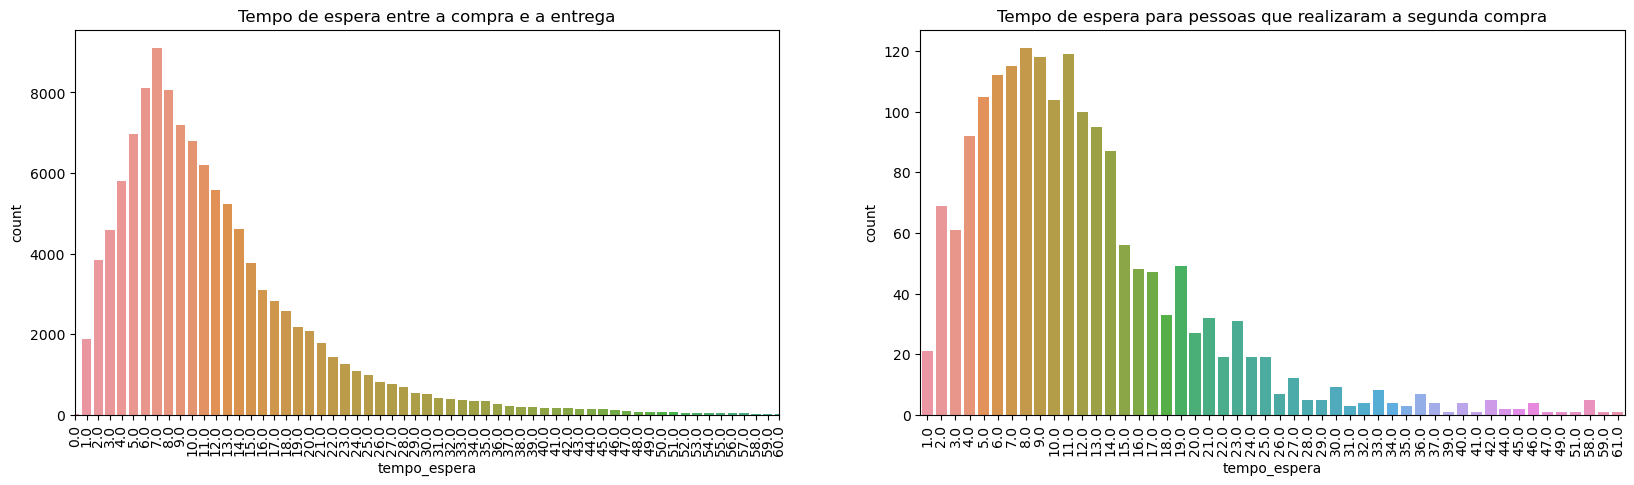

In [62]:
# Tempo que pessoas que realizaram a segunda compra esperaram na primeira compra 
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data = df_sem_id, x = 'tempo_espera')
plt.title('Tempo de espera entre a compra e a entrega')
plt.xlim(0,60)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data = df_primeira_compra, x = 'tempo_espera')
plt.title('Tempo de espera para pessoas que realizaram a segunda compra')
plt.xticks(rotation=90)

plt.show()


O tempo médio de espera entre pessoas que fizeram uma segunda compra em menos de 30 dias e as que não fizeram foi o mesmo.

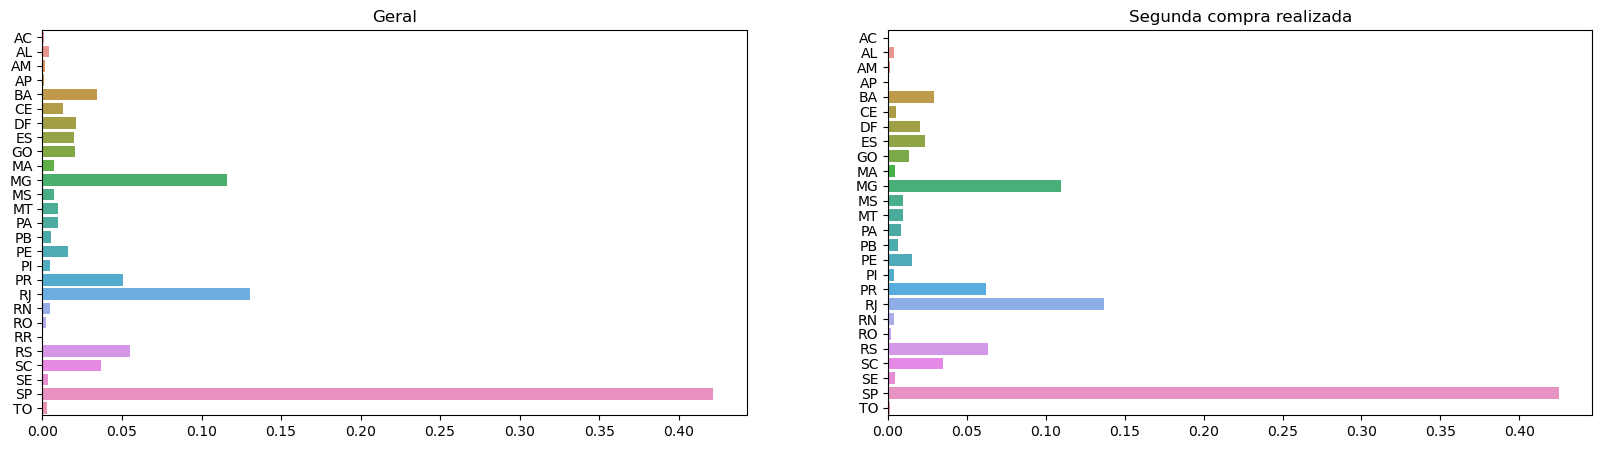

In [63]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(y = df_sem_id.customer_state.value_counts(normalize=True).sort_index().index, x=df_sem_id.customer_state.value_counts(normalize=True).sort_index().values)
plt.title('Geral')

plt.subplot(1,2,2)
sns.barplot(y = df_primeira_compra.customer_state.value_counts(normalize=True).sort_index().index, x=df_primeira_compra.customer_state.value_counts(normalize=True).sort_index().values)
plt.title('Segunda compra realizada')

plt.show()

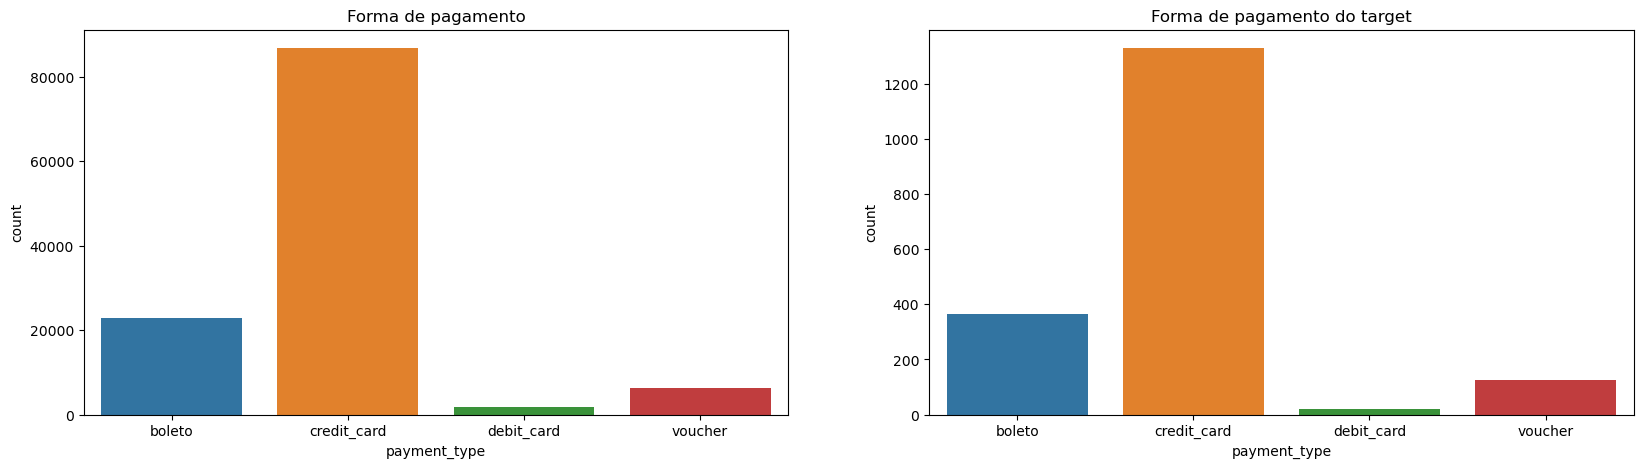

In [64]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df_sem_id.sort_values('payment_type'), x='payment_type')
plt.title('Forma de pagamento')

plt.subplot(1,2,2)
sns.countplot(df_primeira_compra.sort_values('payment_type'), x='payment_type')
plt.title('Forma de pagamento do target')

plt.show()

In [65]:
df_sem_id.segunda_compra.value_counts()

0    116502
1      1875
Name: segunda_compra, dtype: int64

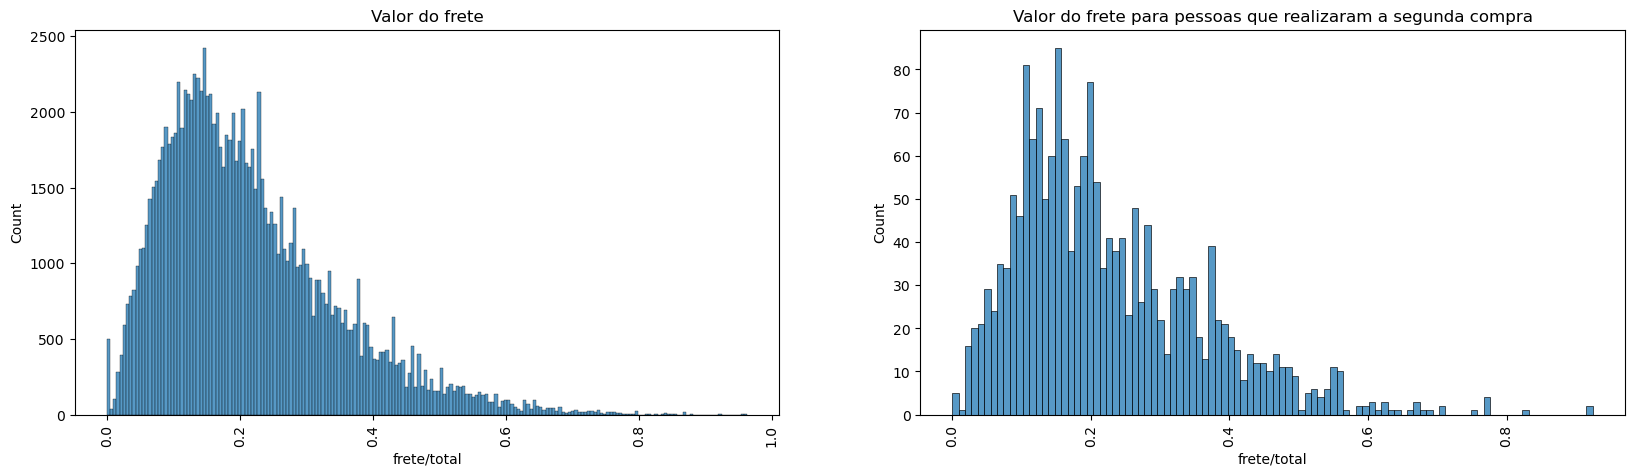

In [69]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.histplot(data = df_sem_id, x = 'frete/total', bins = 200)
plt.title('Valor do frete')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.histplot(data = df_primeira_compra, x = 'frete/total', bins = 100)
plt.title('Valor do frete para pessoas que realizaram a segunda compra')
plt.xticks(rotation=90)

plt.show()

In [72]:
print(f"A porcentagem do frete médio sobre o total geral é de {round(df_sem_id['frete/total'].mean()*100,2)}%. A porcentagem do frete médio sobre o total de pessoas que realizaram a segunda compra é de {round(df_primeira_compra['frete/total'].mean()*100,2)}%.")

A porcentagem do frete médio sobre o total geral é de 21.38%. A porcentagem do frete médio sobre o total de pessoas que realizaram a segunda compra é de 22.59%.


In [80]:
df_sem_id.corr()['segunda_compra']

C:\Users\danil\AppData\Local\Temp\ipykernel_10056\2608890682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sem_id.corr()['segunda_compra']


customer_zip_code_prefix   -0.000955
segunda_compra              1.000000
price                      -0.011708
freight_value              -0.009089
product_weight_g           -0.001562
product_length_cm           0.010432
product_height_cm          -0.005988
product_width_cm            0.009317
payment_sequential          0.011954
payment_installments        0.022258
payment_value               0.009303
frete/total                 0.011732
tempo_espera               -0.000854
Name: segunda_compra, dtype: float64